## Author: Shivam Sharma

## Problem objective: 
### Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

In [ ]:
### Importing necessary liberaries of python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Importing the 311 NYC Service request dataset using pd.read_csv

In [2]:
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\krish\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01-01-16 1:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01-01-16 8:27,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01-01-16 1:17,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [4]:
data.shape

(300698, 53)

There are 300698 rows and 53 columns

In [9]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300697 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300697 non-null  int64  
 1   Created Date                    300697 non-null  object 
 2   Closed Date                     298533 non-null  object 
 3   Agency                          300697 non-null  object 
 4   Agency Name                     300697 non-null  object 
 5   Complaint Type                  300697 non-null  object 
 6   Descriptor                      294783 non-null  object 
 7   Location Type                   300566 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [12]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [13]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [16]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [18]:
data[data['Complaint Type']=='Animal in a Park']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
283132,30427220,04/18/2015 09:44:55 AM,05-02-15 10:35,NYPD,New York City Police Department,Animal in a Park,Animal Waste,Park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.drop(labels=283132, axis=0, inplace=True)

In [22]:
data.shape

(300697, 53)

Earlier it was 300698 rows and 53 columns and after droping one row, now it is 300697 rows and 53 columns.

### Task 2: Read or convert the columnss 'Creatted date and Closed date' to datetime datatype and create a new column 'Request_Closing_Time' as the the time elapsed between request creation and request closing.

In [26]:
data['Created Date']= pd.to_datetime(data['Created Date'])
data['Closed Date']= pd.to_datetime(data['Closed Date'])


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300697 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300697 non-null  int64         
 1   Created Date                    300697 non-null  datetime64[ns]
 2   Closed Date                     298533 non-null  datetime64[ns]
 3   Agency                          300697 non-null  object        
 4   Agency Name                     300697 non-null  object        
 5   Complaint Type                  300697 non-null  object        
 6   Descriptor                      294783 non-null  object        
 7   Location Type                   300566 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

As you can see, data number 1 and 2 i.e. created date and closed date,earlier it was object type and now they are of datetime datatype.

In [30]:
##Creating a new column Request_closing_time
data['Request_Closing_Time'] = data['Closed Date'].values - data['Created Date'].values

In [31]:
data['Request_Closing_Time_mins'] = data['Request_Closing_Time']/np.timedelta64(1,'m')

In [32]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,request_Closing_Time,Request_Closing_Time,Request_Closing_Time_mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0 days 00:55:15,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,0 days 01:26:16,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,0 days 04:51:31,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,0 days 07:45:14,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,0 days 03:27:02,207.033333


In [34]:
data.shape

(300697, 56)

As you can see here.earlier their is 300697 rows and 53 columns and now it is 300697 rows and 56 columns after adding Request_Closing_Time and Request_Closing_mins.

### Task 3: Provide major insights/patterns that you can offer in a visual format (graphs or tables)at least 4 major conclusions that you can come up with after generic data mining.

In [40]:
##Visualizing the dataset with suitable graphs.
## Visualization 1.

In [36]:
data_1 = data.groupby(['City','Complaint Type']).size().unstack().fillna(0)

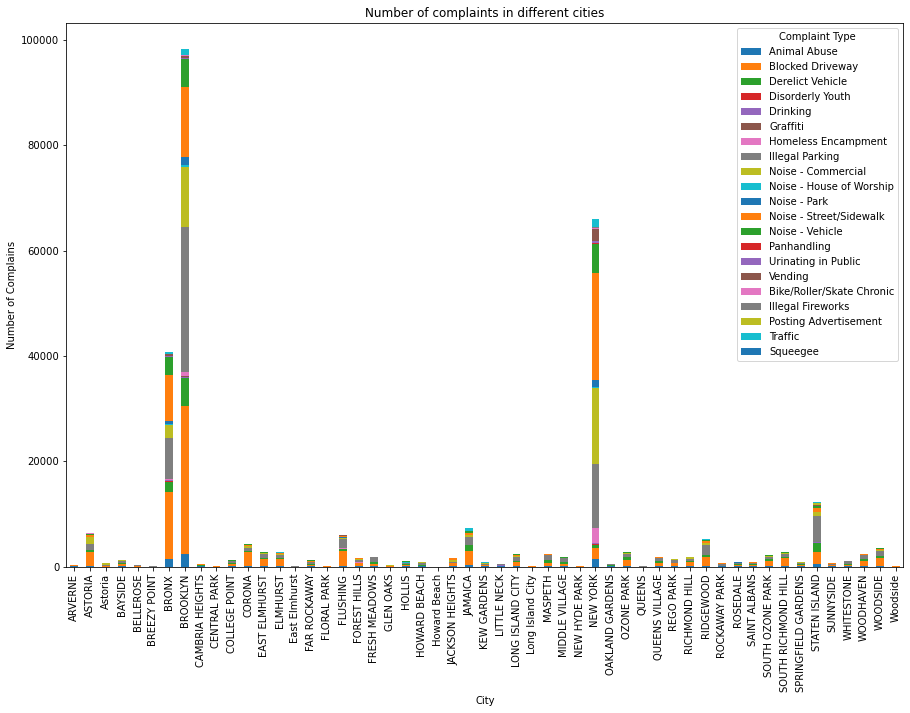

In [39]:
data_1.plot.bar(figsize=(15,10), stacked=True)
plt.title("Number of complaints in different cities")
plt.xlabel('City')
plt.ylabel('Number of Complains')
plt.show()

Conclusion 1: City with maximum number of complaints was found to be Brooklyn having different types of complaints.

In [41]:
##Visualization 2.

[Text(0, 0, 'Illegal Parking'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Noise - Commercial'),
 Text(3, 0, 'Noise - Street/Sidewalk'),
 Text(4, 0, 'Noise - Vehicle'),
 Text(5, 0, 'Traffic'),
 Text(6, 0, 'Derelict Vehicle'),
 Text(7, 0, 'Animal Abuse'),
 Text(8, 0, 'Drinking'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Noise - Park'),
 Text(11, 0, 'Homeless Encampment'),
 Text(12, 0, 'Posting Advertisement'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Graffiti'),
 Text(15, 0, 'Noise - House of Worship'),
 Text(16, 0, 'Bike/Roller/Skate Chronic'),
 Text(17, 0, 'Urinating in Public'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks')]

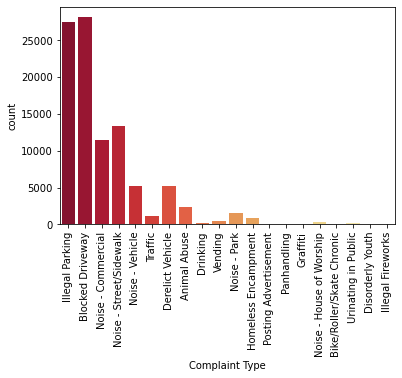

In [48]:
#data.loc[(data['City']=='BROOKLYN'),:]['Complaint Type'].value_counts()
plot= sns.countplot(x=data.loc[data.City=='BROOKLYN']['Complaint Type'], palette='YlOrRd_r')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

Conclusion 2: As we can see here that,Blocked Driveway is the most lodged complaints followed by Illegal Parking.

In [61]:
##Checking the status of Cases in the top five cities.
data_3=data.groupby(['City','Status']).size().unstack().fillna(0)


In [58]:
data_3.sort_values(by='Open', ascending=False).head()


Status,Assigned,Closed,Draft,Open,Unresolved_percentage
City,,,,,
NEW YORK,15.0,65961.0,0.0,18.0,27.692308
BROOKLYN,19.0,98275.0,1.0,12.0,18.461538
JAMAICA,1.0,7286.0,0.0,9.0,13.846154
STATEN ISLAND,2.0,12335.0,0.0,6.0,9.230769
BRONX,6.0,40690.0,1.0,5.0,7.692308


In [59]:
data_3['Unresolved_percentage']= data_3['Open']/data_3['Open'].sum()*100


In [60]:
data_3.sort_values(by='Unresolved_percentage', ascending=False).head().sum()

Status
Assigned                     43.000000
Closed                   224547.000000
Draft                         2.000000
Open                         50.000000
Unresolved_percentage        76.923077
dtype: float64

Conclusion 3: As we can see here that, the maximum number of pending cases were found in New York.
              Maximum Number of complaints has been resolved and the maximum unresolved cases were found in the top 5 cities having maximum number of complaints.
              Total Percentage of unresolved cases is found to be 79.92.

In [68]:
##Visualization 3
data['Location Type'].fillna(value='Street/Sidewalk',inplace=True)

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Street/Sidewalk'),
 Text(1, 0, 'Club/Bar/Restaurant'),
 Text(2, 0, 'Store/Commercial'),
 Text(3, 0, 'House of Worship'),
 Text(4, 0, 'Residential Building/House'),
 Text(5, 0, 'Residential Building'),
 Text(6, 0, 'Park/Playground'),
 Text(7, 0, 'Vacant Lot'),
 Text(8, 0, 'House and Store'),
 Text(9, 0, 'Highway'),
 Text(10, 0, 'Commercial'),
 Text(11, 0, 'Roadway Tunnel'),
 Text(12, 0, 'Subway Station'),
 Text(13, 0, 'Parking Lot'),
 Text(14, 0, 'Bridge'),
 Text(15, 0, 'Terminal'),
 Text(16, 0, 'Ferry')]

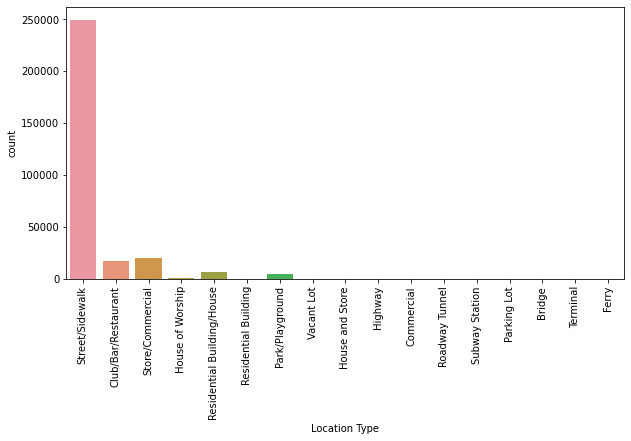

In [71]:
plt.figure(figsize=(10,5))
plot_1 =sns.countplot(data['Location Type'])
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Conclusion 4: The maximum cases were realted to Street/Sideway and it can be resolved if the traffic police strictly look into this matter.

In [93]:
##Visualization 4

Text(0.5, 1.0, 'Average Request Closing Time for Boroughs')

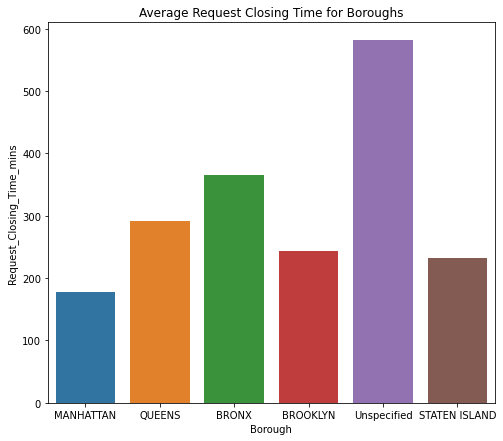

In [97]:
plt.figure(figsize=(8,7))
sns.barplot(x='Borough', y='Request_Closing_Time_mins', data=data,ci=0)
plt.title('Average Request Closing Time for Boroughs')

Conclusion 5: As we observed here that, the maximum average resolving time of complaint for different Boroughs was found in Unspecified location.

In [95]:
data_4=data[['Complaint Type', 'Request_Closing_Time_mins']]
data_5=data_4.groupby('Complaint Type')['Request_Closing_Time_mins'].mean().fillna(0).to_frame()

In [96]:
data_5.head()

,Request_Closing_Time_mins
Complaint Type,
Agency Issues,315.619444
Animal Abuse,312.794630
Bike/Roller/Skate Chronic,225.987736
Blocked Driveway,284.454311
Derelict Vehicle,441.848379


Conclusion 6: As we can see average request closing time for different complaints.

### Task 4: Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [100]:
data_6 = data.groupby(['City','Complaint Type'])['Request_Closing_Time_mins'].mean()
data_6.unstack().fillna(0).head(10)

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Traffic,Squeegee
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,129.217544,151.558095,178.093210,215.475000,14.316667,92.000000,108.887500,138.981897,137.233333,93.731818,...,119.543678,111.592857,62.000000,41.516667,29.000000,0.000000,0.000000,0.000000,0.000000,0.0
ASTORIA,300.010133,288.967068,581.354986,174.155556,283.345238,845.704167,295.055208,290.003464,187.981748,121.333333,...,207.069819,210.550572,69.000000,277.542593,296.125000,104.358889,166.408333,352.200000,324.610993,0.0
Astoria,0.000000,294.877730,374.169444,0.000000,0.000000,0.000000,0.000000,282.677387,212.513410,0.000000,...,222.793860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
BAYSIDE,196.470721,153.784306,201.586785,178.383333,114.000000,273.094444,172.533333,153.760019,134.020000,212.091667,...,91.860000,102.505208,0.000000,0.000000,112.675000,0.000000,0.000000,0.000000,91.616667,0.0
BELLEROSE,763.480952,605.964737,1030.088577,111.000000,235.083333,0.000000,2348.000000,492.187579,404.446396,131.816667,...,544.093590,154.990000,449.000000,452.483333,0.000000,294.000000,400.000000,135.600000,345.530952,0.0
BREEZY POINT,156.808333,79.661111,428.711111,0.000000,158.000000,0.000000,0.000000,236.533333,152.370833,0.000000,...,60.000000,79.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
BRONX,440.129670,375.705840,553.654448,254.304497,347.614894,533.942593,446.514035,394.850575,281.841054,273.572785,...,313.578511,333.647576,852.823684,323.406209,409.541821,207.538333,336.491667,207.719608,295.421127,0.0
BROOKLYN,289.950362,264.647022,356.849385,249.031019,212.433658,494.592248,281.689187,256.334473,179.165509,184.191618,...,197.760122,197.006591,258.988776,233.958824,271.686278,300.282282,140.375137,201.657037,186.775837,0.0
CAMBRIA HEIGHTS,681.350000,461.758730,966.646667,0.000000,0.000000,0.000000,1367.366667,674.606140,228.601389,158.458333,...,276.482667,415.025541,0.000000,0.000000,0.000000,0.000000,91.833333,0.000000,512.802778,0.0


### Task 5:Perform a statistical test for the following:Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
* Whether the average response time across complaint types is similar or not (overall)
* Are the type of complaint or service requested and location related?

### 1)ANOVA Analysis (Checking for top 5 complaints)
* Null Hypothesis: The average response time across complaint types is not similar.
* Alternate Hypothesis: The average response time across complaint types is similar.

In [110]:
from scipy.stats import f_oneway
stat,p = f_oneway(dataset['Noise - Street/Sidewalk'], dataset['Blocked Driveway'], dataset['Illegal Parking'], dataset['Derelict Vehicle'], 
                dataset['Noise - Commercial'])

alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

Null hypothesis is rejected


So, We can say that average response time across complaint types are similar.

<AxesSubplot:>

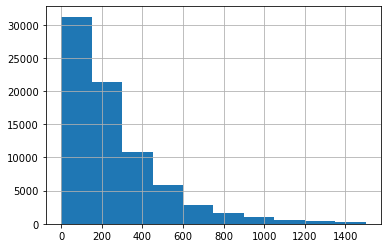

In [113]:
data_7= data[data['Complaint Type']== 'Blocked Driveway']['Request_Closing_Time_mins']
data_7.hist(range=(0,1500)) 

<AxesSubplot:>

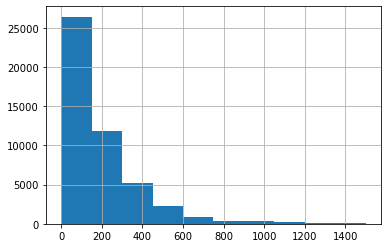

In [114]:
data_8= data[data['Complaint Type']== 'Noise - Street/Sidewalk']['Request_Closing_Time_mins']
data_8.hist(range=(0,1500))

From the given histogram, we can see that, the average responsise time for across complaints types are similar.

#### 2)Are the type of complaint or service requested and location related?

In [115]:
data_9= data[['Complaint Type','Location','Latitude','Longitude','City','Borough']]
data_9.head()

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,NEW YORK,MANHATTAN
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,ASTORIA,QUEENS
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525,BRONX,BRONX
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)",40.835994,-73.828379,BRONX,BRONX
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)",40.733060,-73.874170,ELMHURST,QUEENS


In [118]:
data_9['Complaint Type']=data_9['Complaint Type'].astype('category').cat.codes
data_9['City']= data_9['City'].astype('category').cat.codes
data_9['Borough']= data_9['Borough'].astype('category').cat.codes

<ipython-input-118-bbde464cf36f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9['Complaint Type']=data_9['Complaint Type'].astype('category').cat.codes
<ipython-input-118-bbde464cf36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9['City']= data_9['City'].astype('category').cat.codes
<ipython-input-118-bbde464cf36f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [120]:
data_9.head()

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,15,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,33,2
1,3,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,1,3
2,3,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525,6,0
3,11,"(40.83599404683083, -73.82837939584206)",40.835994,-73.828379,6,0
4,11,"(40.733059618956815, -73.87416975810375)",40.733060,-73.874170,13,3


In [122]:
data_9.corr(method='pearson')

,Complaint Type,Latitude,Longitude,City,Borough
Complaint Type,1.000000,0.151318,-0.185947,0.092497,-0.058457
Latitude,0.151318,1.000000,0.364966,-0.000571,-0.249501
Longitude,-0.185947,0.364966,1.000000,-0.123933,0.021277
City,0.092497,-0.000571,-0.123933,1.000000,0.654636
Borough,-0.058457,-0.249501,0.021277,0.654636,1.000000


As we can see here from the first line of table that, complaint type is not dependent upon location.

### Summary

#### From the give analysis we have found out some of the conclusions:
* Conclusion 1: City with maximum number of complaints was found to be Brooklyn having different types of complaints.
* Conclusion 2: As we can see here that,Blocked Driveway is the most lodged complaints followed by Illegal Parking.
* Conclusion 3: As we can see here that, the maximum number of pending cases were found in New York.Maximum Number of complaints has been resolved and the maximum unresolved cases were found in the top 5 cities having maximum number of complaints.Total Percentage of unresolved cases is found to be 79.92.
* Conclusion 4: The maximum cases were realted to Street/Sideway and it can be resolved if the traffic police strictly look into this matter.
* Conclusion 5: As we observed here that, the maximum average resolving time of complaint for different Boroughs was found in Unspecified location.

#### Result of Statistical testing:
*  We can say that average response time across complaint types are similar.
*  Complaints types are not dependent on location or we can say that types of complaints or services requested and location is not realted.